# Visualization Demos

In [1]:
%pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 45.7 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
from qutip import about, basis, identity, sigmax, sigmay, sigmaz

%matplotlib inline

## Hinton

In [3]:
rho = qt.rand_dm(5)

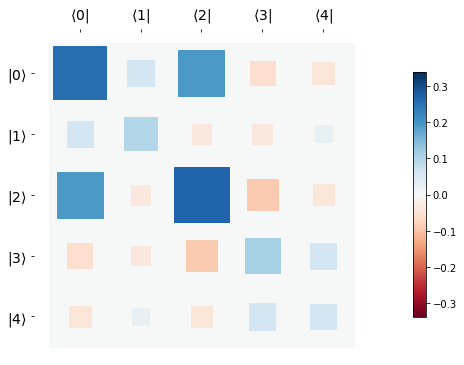

In [4]:
qt.hinton(rho);

## SpherePlot

In [5]:
theta = np.linspace(0, np.pi, 90)
phi = np.linspace(0, 2 * np.pi, 60)

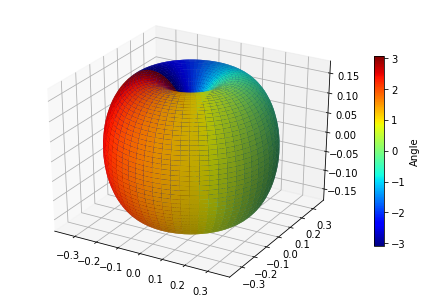

In [6]:
qt.sphereplot(theta, phi, qt.orbital(theta, phi, basis(3, 0)).T);

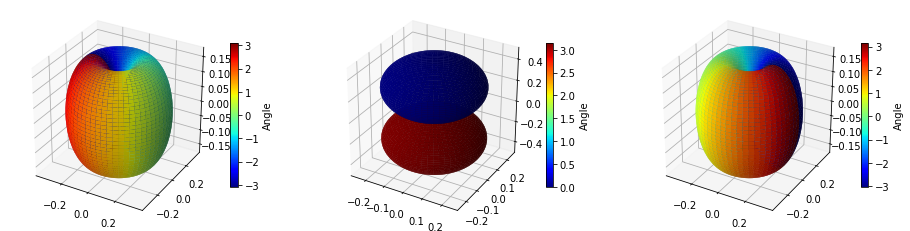

In [7]:
fig = plt.figure(figsize=(16, 4))

ax = fig.add_subplot(1, 3, 1, projection="3d")
qt.sphereplot(theta, phi, qt.orbital(theta, phi, basis(3, 0)).T, fig, ax)

ax = fig.add_subplot(1, 3, 2, projection="3d")
qt.sphereplot(theta, phi, qt.orbital(theta, phi, basis(3, 1)).T, fig, ax)

ax = fig.add_subplot(1, 3, 3, projection="3d")
qt.sphereplot(theta, phi, qt.orbital(theta, phi, basis(3, 2)).T, fig, ax);

## Matrix Histogram

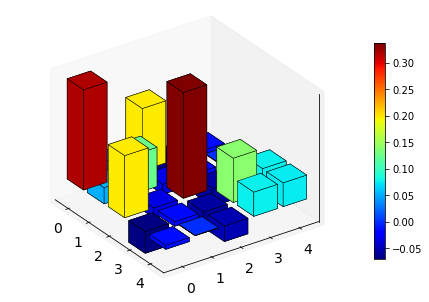

In [8]:
qt.matrix_histogram(rho.full().real);

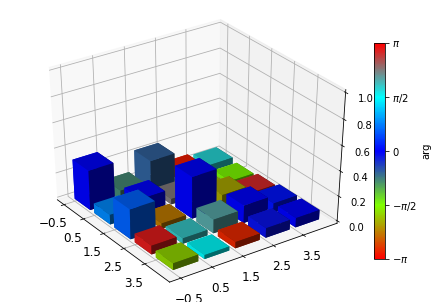

In [9]:
qt.matrix_histogram_complex(rho.full());

## Plot Energy Levels

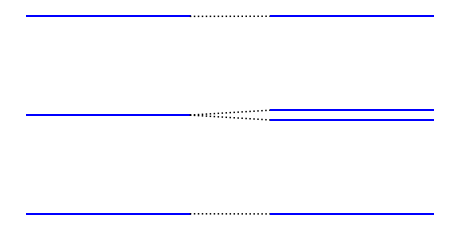

In [10]:
H0 = qt.tensor(sigmaz(), identity(2)) + qt.tensor(identity(2), sigmaz())
Hint = 0.1 * qt.tensor(sigmax(), sigmax())

qt.plot_energy_levels([H0, Hint], figsize=(8, 4));

## Plot Fock distribution

In [11]:
rho = (qt.coherent(15, 1.5) + qt.coherent(15, -1.5)).unit()

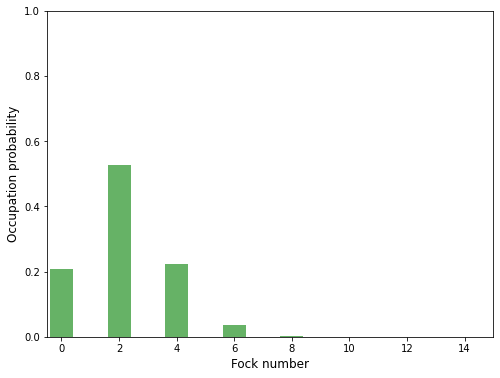

In [12]:
qt.plot_fock_distribution(rho);

## Plot Wigner function and Fock distribution

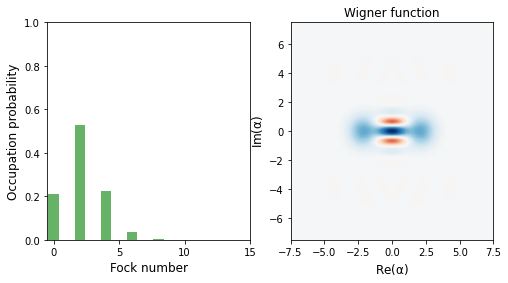

In [13]:
qt.plot_wigner_fock_distribution(rho);

## Plot winger function

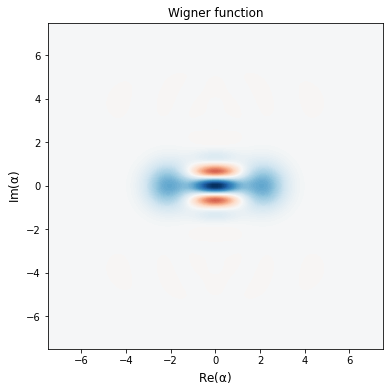

In [14]:
qt.plot_wigner(rho, figsize=(6, 6));

## Plot expectation values

In [15]:
H = sigmaz() + 0.3 * sigmay()
e_ops = [sigmax(), sigmay(), sigmaz()]
times = np.linspace(0, 10, 100)
psi0 = (basis(2, 0) + basis(2, 1)).unit()
result = qt.mesolve(H, psi0, times, [], e_ops)

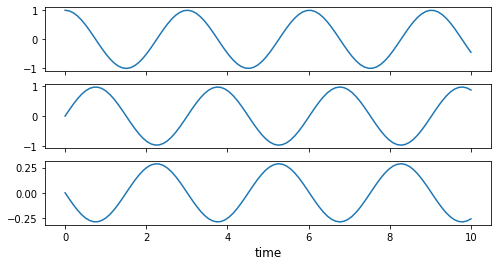

In [16]:
qt.plot_expectation_values(result);

## Bloch Sphere

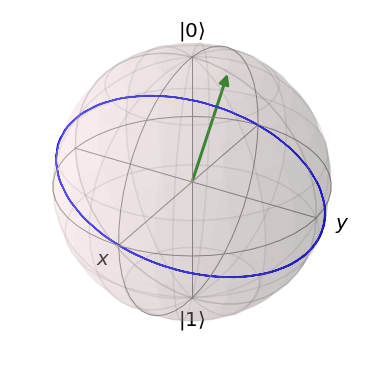

In [17]:
b = qt.Bloch()
b.add_vectors(qt.expect(H.unit(), e_ops))
b.add_points(result.expect, meth="l")
b.make_sphere()

## Plot Spin Q functions

In [18]:
j = 5
psi = qt.spin_state(j, -j)
psi = qt.spin_coherent(j, np.random.rand() * np.pi,
                       np.random.rand() * 2 * np.pi)
rho = qt.ket2dm(psi)

In [19]:
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)

In [20]:
Q, THETA, PHI = qt.spin_q_function(psi, theta, phi)

## 2D

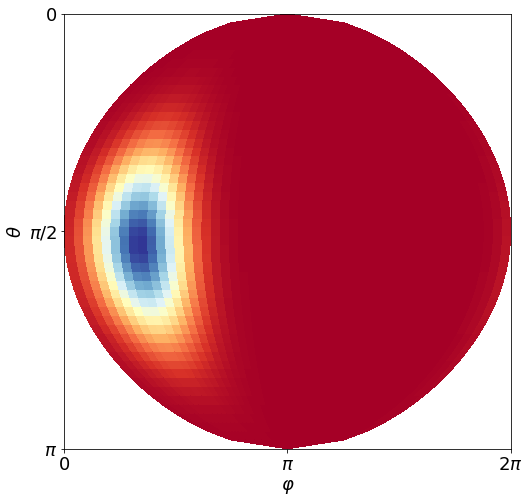

In [21]:
qt.plot_spin_distribution_2d(Q, THETA, PHI);

## 3D

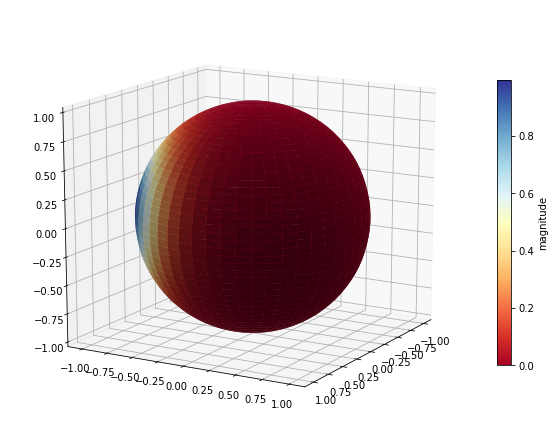

In [22]:
fig, ax = qt.plot_spin_distribution_3d(Q, THETA, PHI)

ax.view_init(15, 30)

## Combined 2D and 3D

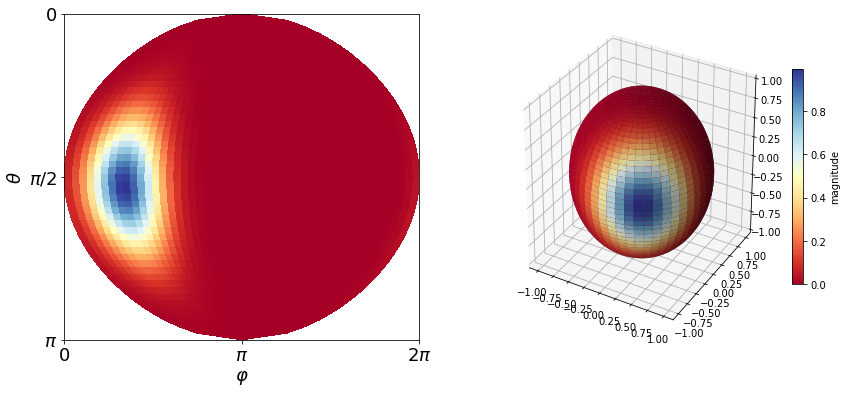

In [23]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
f1, a1 = qt.plot_spin_distribution_2d(Q, THETA, PHI, fig=fig, ax=ax)

ax = fig.add_subplot(1, 2, 2, projection="3d")
f2, a2 = qt.plot_spin_distribution_3d(Q, THETA, PHI, fig=fig, ax=ax)

## Plot Spin Wigner functions

In [24]:
W, THETA, PHI = qt.spin_wigner(psi, theta, phi)

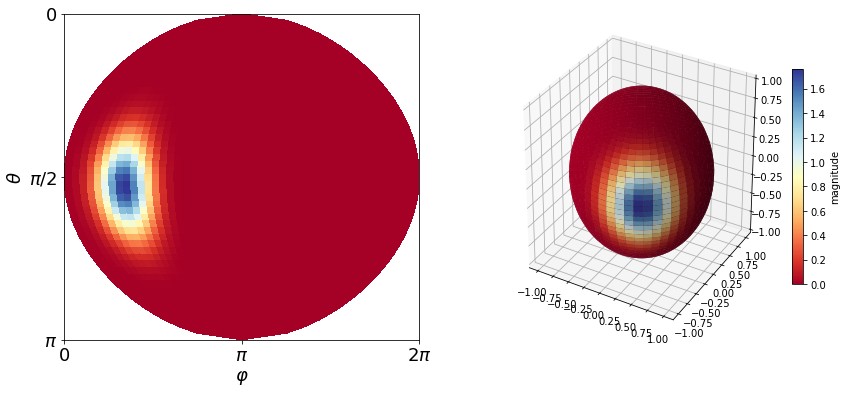

In [25]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
f1, a1 = qt.plot_spin_distribution_2d(W.real, THETA, PHI, fig=fig, ax=ax)

ax = fig.add_subplot(1, 2, 2, projection="3d")
f2, a2 = qt.plot_spin_distribution_3d(W.real, THETA, PHI, fig=fig, ax=ax)

## Software versions

In [26]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.1
Numpy Version:      1.21.6
Scipy Version:      1.7.3
Cython Version:     0.29.33
Matplotlib Version: 3.2.2
Python Version:     3.8.10
Number of CPUs:     2
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /usr/local/lib/python3.8/dist-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qut